In [67]:
import networkx as nx
import random
import pandas as pd
import os

from IPython.display import HTML

from GraphGenusGenerator import GraphGenusGenerator
from HC_Algorithm import hill_climb
from SimulatedAnnealing import simulated_annealing
from RHC_Algorithm import random_hill_climb

In [68]:
seed=random.randint(0, 2**32 - 1)
max_iter = 10000
number_of_nodes = 7
complete_graph = True
record_file = "random_hill_climb_iterations.csv"
problem = GraphGenusGenerator().generate(seed=seed, number_of_nodes=number_of_nodes, max_connections_per_node=10, complete_graph=complete_graph)

# Print starting data
print("Starting State:", problem.adj_list)
print("Seed:", seed)
print("Max Iterations:", max_iter)


Starting State: {0: [1, 2, 3, 4, 5, 6], 1: [0, 2, 3, 4, 5, 6], 2: [0, 1, 3, 4, 5, 6], 3: [0, 1, 2, 4, 5, 6], 4: [0, 1, 2, 3, 5, 6], 5: [0, 1, 2, 3, 4, 6], 6: [0, 1, 2, 3, 4, 5]}
Seed: 3513197228
Max Iterations: 10000


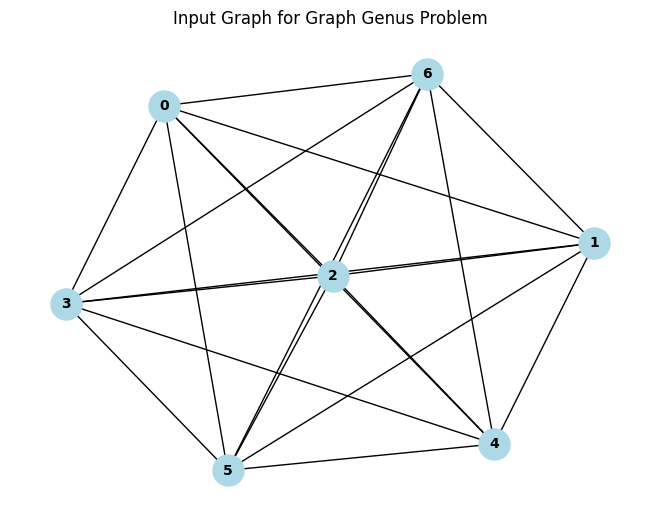

In [69]:
# Get the adjacency list (which is a graph object)
adj_list = problem.adj_list
graph = nx.Graph(adj_list)

def is_power_of_two(n):
    return (n != 0) and (n & (n - 1)) == 0

# Draw the generated graph
import matplotlib.pyplot as plt
nx.draw(graph, with_labels=True, node_color='lightblue', node_size=500, font_size=10, font_weight='bold')
plt.title("Input Graph for Graph Genus Problem")
plt.show()

In [70]:
def get_best_result(file_path):
    df = pd.read_csv(file_path)
    min_fitness = df['Fitness'].min()
    min_fitness_df = df[df['Fitness'] == min_fitness]
    min_fitness_df_sorted = min_fitness_df.sort_values(by='FitnessEvalTime')
    best_result = min_fitness_df_sorted.iloc[0]
    return best_result

# Run the simulated annealing function and collect iteration data
# final_state, final_fitness, iteration_data = simulated_annealing(problem=problem, max_iters=max_iter, random_state=seed, curve=True)
final_fitness, final_state, iteration_data = hill_climb(problem=problem, max_iter=max_iter, seed=seed, record_file="hill_climb_iterations.csv")
# final_fitness, final_state, iteration_data = random_hill_climb(problem=problem, max_iters=max_iter, restarts=10, random_state=seed, record_file=record_file)

# Convert the iteration data to a DataFrame and save to CSV
df_run_stats = pd.DataFrame(iteration_data)
df_run_stats.to_csv(record_file, index=False)

# Filter the data to include only the iterations with iter = to a power of 2 and the last one
filtered_data = df_run_stats[df_run_stats['Iteration'].apply(is_power_of_two) | (df_run_stats['Iteration'] == df_run_stats['Iteration'].max())]

# Convert the filtered data DataFrame to an HTML table and display it
html_filtered_table = filtered_data.to_html(index=False)
display(HTML(html_filtered_table))

Iteration,Fitness,FitnessEvalTime,Time,State
1,6,0.000022,0.008628,"{0: [1, 2, 3, 4, 5, 6], 1: [0, 2, 3, 4, 5, 6], 2: [0, 1, 3, 4, 5, 6], 3: [0, 1, 2, 4, 5, 6], 4: [0, 1, 2, 3, 5, 6], 5: [0, 1, 2, 3, 6, 4], 6: [0, 1, 2, 3, 4, 5]}"
2,6,0.000022,0.012520,"{0: [6, 5, 4, 3, 2, 1], 1: [6, 5, 4, 3, 2, 0], 2: [6, 5, 4, 3, 1, 0], 3: [6, 5, 4, 2, 1, 0], 4: [6, 5, 3, 2, 1, 0], 5: [4, 6, 3, 2, 0, 1], 6: [0, 1, 2, 3, 4, 5]}"
4,5,0.000031,0.021996,"{0: [6, 5, 4, 3, 2, 1], 1: [6, 5, 4, 3, 2, 0], 2: [0, 4, 5, 6, 3, 1], 3: [6, 5, 4, 2, 1, 0], 4: [6, 5, 3, 2, 1, 0], 5: [4, 6, 3, 2, 0, 1], 6: [0, 1, 2, 3, 4, 5]}"
8,5,0.000024,0.038804,"{0: [6, 1, 5, 4, 3, 2], 1: [6, 5, 4, 3, 2, 0], 2: [0, 4, 5, 6, 3, 1], 3: [6, 5, 4, 2, 1, 0], 4: [6, 5, 3, 2, 1, 0], 5: [1, 6, 0, 4, 3, 2], 6: [0, 1, 2, 3, 4, 5]}"
16,4,0.000021,0.070024,"{0: [6, 1, 5, 4, 3, 2], 1: [6, 5, 4, 3, 2, 0], 2: [0, 4, 5, 6, 3, 1], 3: [6, 5, 4, 2, 1, 0], 4: [6, 5, 3, 2, 1, 0], 5: [1, 6, 0, 4, 3, 2], 6: [1, 0, 2, 3, 4, 5]}"
32,4,0.000021,0.129427,"{0: [3, 2, 6, 1, 5, 4], 1: [6, 5, 4, 3, 2, 0], 2: [0, 4, 5, 6, 3, 1], 3: [6, 5, 4, 2, 1, 0], 4: [6, 5, 3, 2, 1, 0], 5: [1, 6, 0, 4, 3, 2], 6: [1, 0, 2, 3, 4, 5]}"
35,4,0.000021,0.136838,"{0: [3, 4, 5, 1, 6, 2], 1: [0, 2, 3, 4, 5, 6], 2: [1, 3, 6, 5, 4, 0], 3: [0, 1, 2, 4, 5, 6], 4: [0, 1, 2, 3, 5, 6], 5: [2, 3, 4, 0, 6, 1], 6: [5, 4, 3, 2, 0, 1]}"


In [71]:
# Example usage to get and display the best result
best_result = get_best_result(record_file)

# Convert the best result to a DataFrame
df_best_result = pd.DataFrame([best_result])

# Convert the DataFrame to an HTML table and display it
html_best_result_table = df_best_result.to_html(index=False)
display(HTML(html_best_result_table))

# Print final results
print("Final Fitness:", final_fitness)
print("Final State:", final_state)

Iteration,Fitness,FitnessEvalTime,Time,State
25,4,0.000021,0.103039,"{0: [2, 3, 4, 5, 1, 6], 1: [0, 2, 3, 4, 5, 6], 2: [1, 3, 6, 5, 4, 0], 3: [0, 1, 2, 4, 5, 6], 4: [0, 1, 2, 3, 5, 6], 5: [2, 3, 4, 0, 6, 1], 6: [5, 4, 3, 2, 0, 1]}"


Final Fitness: 4
Final State: {0: [3, 4, 5, 1, 6, 2], 1: [0, 2, 3, 4, 5, 6], 2: [1, 3, 6, 5, 4, 0], 3: [0, 1, 2, 4, 5, 6], 4: [0, 1, 2, 3, 5, 6], 5: [2, 3, 4, 0, 6, 1], 6: [5, 4, 3, 2, 0, 1]}


In [72]:
def save_best_result(best_result, number_of_nodes, complete_graph, seed, algorithm_name, file_path="best_results.csv"):
    data = {
        'Algorithm': [algorithm_name],
        'Number of Nodes': [number_of_nodes],
        'Is Complete': [complete_graph],
        'Final Fitness': [best_result['Fitness']],
        'Time': [best_result['Time']],
        'Seed': [seed],
        'Final State': [best_result['State']]
    }
    df = pd.DataFrame(data)
    # Check if the file exists
    if os.path.exists(file_path):
        # If the file exists, append the new data
        df.to_csv(file_path, mode='a', header=False, index=False)
    else:
        # If the file doesn't exist, create a new one
        df.to_csv(file_path, index=False)

# Example usage:
file_path = "best_results.csv"  # Change the file path accordingly
algorithm_name = "Hill Climb"
# algorithm_name = "Random Hill Climb"
# algorithm_name = "Simulated Annealing"
save_best_result(best_result, number_of_nodes, complete_graph, seed, algorithm_name, file_path)
